<a href="https://colab.research.google.com/github/sergiyenkoalina/machine-learning-course/blob/main/HW_2_2_%D0%9B%D0%BE%D0%B3%D1%96%D1%81%D1%82%D0%B8%D1%87%D0%BD%D0%B0_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%8F_%D0%B7_scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні ми побудуємо рішення задачі логістичної регресії і створимо ваш перший submission на змагання на Kaggle. Усі кроки були розглянуті в лекції та містяться в ноутбуці `Логістична регресія з ScikitLearn. Повна ML задача.ipynb`, але тепер ми їх адаптуємо до іншої задачі - все як в реальному житті, коли ви знайшли код у відкритих джерелах і адаптуєте на проєкті 😉

**Погнали! 🚀🚀🚀**

-----------



0. Завантажте дані `train.csv`, `test.csv`, `sample_submission.csv` зі змагання на Kaggle ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/competitions/bank-customer-churn-prediction-dlu-course-c-2). Для завантаження потрібно долучитись до змагання (натиснути кнопку "Join").

1. Зчитайте дані `train.csv` в pandas dataframe та розбийте їх на train і validation піднабори.

  * Є такий параметр в методі train_test_split як stratified. Можливо він буде Вам корисним при розбитті даних в цій задачі. Пропоную Вам почитати про нього в документації і спробувати скористатись.

In [1]:
!pip install pyarrow --quiet

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
df=pd.read_csv('/content/drive/MyDrive/data/Kaggle | Bank Customer Churn Prediction/train.csv')
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15779985.0,Nwankwo,678.0,France,Male,29.0,4.0,0.00,3.0,1.0,0.0,180626.36,0.0
1,1,15650086.0,Ch'in,687.0,France,Female,34.0,1.0,0.00,2.0,0.0,1.0,63736.17,0.0
2,2,15733602.0,Thompson,682.0,France,Female,52.0,6.0,0.00,3.0,0.0,0.0,179655.87,1.0
3,3,15645794.0,Macleod,753.0,Germany,Male,44.0,6.0,83347.25,2.0,1.0,0.0,161407.48,0.0
4,4,15633840.0,Hsia,544.0,Germany,Female,55.0,0.0,107747.57,1.0,1.0,0.0,176580.86,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   CustomerId       15000 non-null  float64
 2   Surname          15000 non-null  object 
 3   CreditScore      15000 non-null  float64
 4   Geography        15000 non-null  object 
 5   Gender           15000 non-null  object 
 6   Age              15000 non-null  float64
 7   Tenure           15000 non-null  float64
 8   Balance          15000 non-null  float64
 9   NumOfProducts    15000 non-null  float64
 10  HasCrCard        15000 non-null  float64
 11  IsActiveMember   15000 non-null  float64
 12  EstimatedSalary  15000 non-null  float64
 13  Exited           15000 non-null  float64
dtypes: float64(10), int64(1), object(3)
memory usage: 1.6+ MB


In [32]:
df=df.drop(['id', 'CustomerId', 'Surname'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      15000 non-null  float64
 1   Geography        15000 non-null  object 
 2   Gender           15000 non-null  object 
 3   Age              15000 non-null  float64
 4   Tenure           15000 non-null  float64
 5   Balance          15000 non-null  float64
 6   NumOfProducts    15000 non-null  float64
 7   HasCrCard        15000 non-null  float64
 8   IsActiveMember   15000 non-null  float64
 9   EstimatedSalary  15000 non-null  float64
 10  Exited           15000 non-null  float64
dtypes: float64(9), object(2)
memory usage: 1.3+ MB


In [33]:
train_val_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify= df['Exited'])
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42, stratify= train_val_df['Exited'])

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9000 entries, 63 to 8106
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      9000 non-null   float64
 1   Geography        9000 non-null   object 
 2   Gender           9000 non-null   object 
 3   Age              9000 non-null   float64
 4   Tenure           9000 non-null   float64
 5   Balance          9000 non-null   float64
 6   NumOfProducts    9000 non-null   float64
 7   HasCrCard        9000 non-null   float64
 8   IsActiveMember   9000 non-null   float64
 9   EstimatedSalary  9000 non-null   float64
 10  Exited           9000 non-null   float64
dtypes: float64(9), object(2)
memory usage: 843.8+ KB


In [9]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, 4434 to 12358
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      3000 non-null   float64
 1   Geography        3000 non-null   object 
 2   Gender           3000 non-null   object 
 3   Age              3000 non-null   float64
 4   Tenure           3000 non-null   float64
 5   Balance          3000 non-null   float64
 6   NumOfProducts    3000 non-null   float64
 7   HasCrCard        3000 non-null   float64
 8   IsActiveMember   3000 non-null   float64
 9   EstimatedSalary  3000 non-null   float64
 10  Exited           3000 non-null   float64
dtypes: float64(9), object(2)
memory usage: 281.2+ KB


2. Визначіть назви колонок, які сформують вхідні незалежні дані, в змінній `input_cols` та назву колонки , яка є цільовою, в змінній `target_col`. Використовуючи `input_cols` та `target_col` створіть набори даних `train_inputs`, `train_targets`, `val_inputs`, `val_targets` - де `inputs` - вхідні дані (датафрейм), `targets` - дані цільової колонки відповідного піднабору.

In [34]:
target_col='Exited'
input_cols=list(train_df.columns)
input_cols.remove(target_col)
input_cols

['CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary']

In [35]:
train_inputs = train_df[input_cols]
train_targets = train_df[target_col]
val_inputs = val_df[input_cols]
val_targets = val_df[target_col]

3. Визначіть з допомогою `pandas.DataFrame.select_dtypes` назви колонок, які є числовими і категоріальними. Запишіть результати в `numeric_cols` та `categorical_cols` відповідно.

In [36]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [13]:
numeric_cols

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary']

In [14]:
categorical_cols

['Geography', 'Gender']

4. Зробіть підготовку даних в категоріальних і числових колонках для входу в модель виходячи з освоєного на даний момент на курсі. Варіанти пеердобробки, з якими ми вже знайомі:
  - масштабування числових ознак,
  - заповнення пропущених значень, якщо вони є,
  - кодування категоріальних ознак, вилучення ознак, якщо ми вважаємо, що ці дані нерелевантні для моделі аби ми не бачимо способу як їх так закодувати, аби подати на вхід моделі.

  Тут є багато варіантів, як Ви побудуєте передобробку, важливо аби
  1) передобробка мала сенс (немає сенсу заповнювати дані константою, яку ми не зрозуміло звідки взяли)   
  2) має бути виконана принаймні одна дія передобробки
  3) обробка має бути виконана коректно і для тренувальних, і для вал. даних
  4) чим вищий у Вас врешті вийде ROС AUC скор, тим більше шансів перемогти у змаганні :)

  Опишіть рішення проведення кожного з кроків передобробки. Для чого ви його робите? По завершенню виведіть по 5 значен з `train_inputs`, `val_inputs` використовуючи `display()`.

In [37]:
train_inputs[categorical_cols].value_counts()

Geography  Gender
France     Male      3215
           Female    2200
Spain      Male      1119
           Female     842
Germany    Male       832
           Female     792
Name: count, dtype: int64

<ipython-input-38-006ebb6e1237>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( data=train_df,x='Geography', y='Exited', errorbar=None, palette='viridis' )


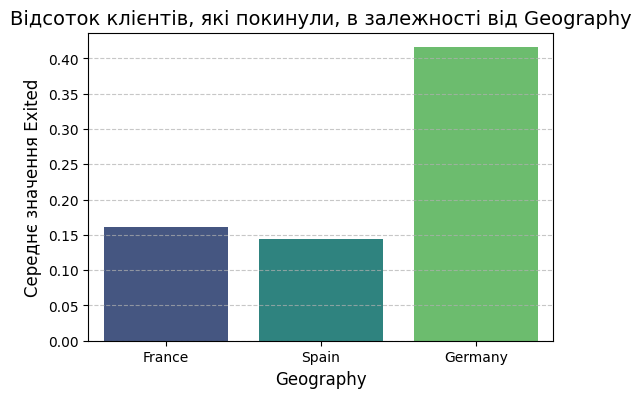

In [38]:
plt.figure(figsize=(6, 4))
sns.barplot( data=train_df,x='Geography', y='Exited', errorbar=None, palette='viridis' )

plt.title('Відсоток клієнтів, які покинули, в залежності від Geography', fontsize=14)
plt.xlabel('Geography', fontsize=12)
plt.ylabel('Середнє значення Exited', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [17]:
!pip install category_encoders

In [39]:
import category_encoders as ce

In [40]:
from category_encoders import TargetEncoder

encoder = TargetEncoder(cols=categorical_cols)
encoder.fit(train_inputs[categorical_cols], train_targets)

TargetEncoder(cols=['Geography', 'Gender'])

In [24]:
##########
class TargetEncoder:
    def __init__(self):
        self.target_means = {}
        self.default_mean = None

    def fit(self, df, categorical_cols, target_col):
        """Навчає кодувальник на основі середнього значення таргету для кожної категорії"""
        self.target_means = {
            col: df.groupby(col)[target_col].mean().to_dict() for col in categorical_cols
        }
        self.default_mean = df[target_col].mean()  # Значення для невідомих категорій

    def transform(self, df, categorical_cols):
        """Перетворює категоріальні змінні у числові за допомогою target encoding"""
        encoded_df = df.copy()
        for col in categorical_cols:
            encoded_col = col + "_encoded"
            encoded_df[encoded_col] = df[col].map(self.target_means[col]).fillna(self.default_mean)
        return encoded_df

In [17]:
###########
encoder = TargetEncoder()
encoder.fit(train_df, categorical_cols, "Exited")

In [41]:
train_inputs[categorical_cols] = encoder.transform (train_inputs[categorical_cols])
val_inputs[categorical_cols] = encoder.transform (val_inputs[categorical_cols])

<ipython-input-41-05acf38f7940>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_inputs[categorical_cols] = encoder.transform (train_inputs[categorical_cols])
<ipython-input-41-05acf38f7940>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_inputs[categorical_cols] = encoder.transform (val_inputs[categorical_cols])


In [42]:
##encoded_cols = [col + "_encoded" for col in categorical_cols]

In [20]:
#############
#train_inputs=train_inputs.drop(['Geography', 'Gender'], axis=1)
#val_inputs=val_inputs.drop(['Geography', 'Gender'], axis=1)

In [44]:
train_inputs.describe().round(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,9000.00,9000.00,9000.00,9000.00,9000.00,9000.00,9000.00,9000.00,9000.00,9000.00
mean,658.58,0.20,0.20,37.68,5.02,43029.89,1.59,0.79,0.49,117966.92
std,72.00,0.10,0.07,8.12,2.78,59826.88,0.53,0.41,0.50,45719.05
min,431.00,0.14,0.14,18.00,0.00,0.00,1.00,0.00,0.00,11.58
25%,603.00,0.16,0.14,32.00,3.00,0.00,1.00,1.00,0.00,83092.52
50%,661.00,0.16,0.14,37.00,5.00,0.00,2.00,1.00,0.00,123542.16
75%,708.00,0.16,0.28,42.00,7.00,109735.03,2.00,1.00,1.00,157097.09
max,850.00,0.42,0.28,72.00,10.00,209767.31,4.00,1.00,1.00,199992.48


Були закодовані два категоріальних стовпця - Стать та Географічне положення. Для статі використано Label Encoding як найбільш очевидний і поширений варіант для цих даних, для географічного положення використано Target Encoding (використання середнього значення таргета для кожної категорії для підвищення якості моделі).

<Axes: >

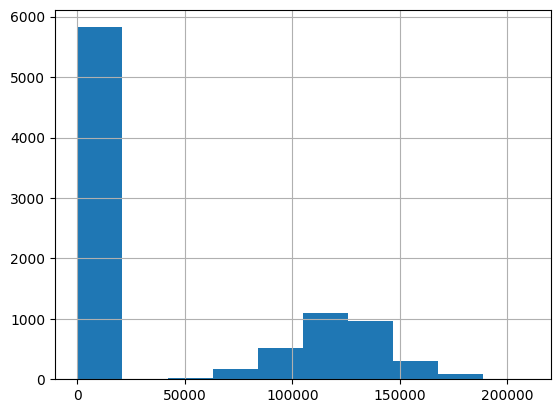

In [45]:
train_inputs.Balance.hist()

На гістограммі Balance можна зауважити, що мода для цієї змінної дорівнює 0, що значно відрізняється від основного розподілу. Це може мати вплив на цільову змінну, тому має сенс виділити записи з нульовим балансом у окрему категорію. Для цього створений бінарний стовпець IsZeroBalance, який має значення 1 для записів із нульовим балансом.

In [46]:
train_inputs['IsZeroBalance'] = (df['Balance'] == 0).astype(int)
val_inputs['IsZeroBalance'] = (df['Balance'] == 0).astype(int)

In [47]:
cols_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance','NumOfProducts','EstimatedSalary']
scaler = StandardScaler()
scaler.fit(train_inputs[cols_to_scale])
train_inputs[cols_to_scale] = scaler.transform(train_inputs[cols_to_scale])
val_inputs[cols_to_scale] = scaler.transform(val_inputs[cols_to_scale])

Були стандартизовані стовпці 'CreditScore', 'Age', 'Tenure', 'Balance','NumOfProducts','EstimatedSalary' - через різні масштаби змінних.

In [48]:
print("Train inputs (scaled):")
display(train_inputs.head().round(2))

print("\nValidation inputs (scaled):")
display(val_inputs.head().round(2))

Train inputs (scaled):


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,IsZeroBalance
63,1.17,0.16,0.14,-0.21,-0.01,-0.72,0.77,0.0,1.0,-0.61,1
13717,-0.72,0.16,0.14,-0.33,0.35,-0.72,0.77,1.0,1.0,0.76,1
13292,1.62,0.16,0.28,-0.58,0.35,1.31,-1.11,1.0,0.0,0.51,0
9615,-1.01,0.14,0.14,1.27,-1.45,-0.72,-1.11,0.0,1.0,0.70,1
1618,0.71,0.16,0.14,-0.70,-0.01,-0.72,0.77,1.0,0.0,-1.08,1



Validation inputs (scaled):


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,IsZeroBalance
4434,-1.38,0.16,0.14,0.29,0.71,1.51,-1.11,0.0,1.0,1.46,0
8707,1.16,0.16,0.14,-0.45,0.71,-0.72,0.77,0.0,1.0,1.06,1
679,1.59,0.16,0.14,-0.45,0.71,-0.72,0.77,1.0,0.0,-0.52,1
4765,-0.83,0.16,0.14,0.16,-0.37,-0.72,0.77,1.0,1.0,0.19,1
9354,0.66,0.42,0.28,0.16,1.43,0.95,0.77,1.0,1.0,0.27,0


5. Збережіть дані, що містяться в змінних `train_inputs`, `train_targets`, `val_inputs`, `val_targets` на диск в форматі `parquet`. В кінці виведіть список файлів в папці, в яку Ви зберегли файли і перевірте, чи файли збереглись. Вивести список файлів можна з `os.listdir(your_dir)` або `!ls your_dir`

In [49]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)

train_inputs: (9000, 11)
train_targets: (9000,)
val_inputs: (3000, 11)
val_targets: (3000,)


In [50]:
data_dir='/content/drive/MyDrive/data/Kaggle | Bank Customer Churn Prediction'

In [51]:
train_inputs.to_parquet(os.path.join(data_dir, 'train_inputs.parquet'))
val_inputs.to_parquet(os.path.join(data_dir, 'val_inputs.parquet'))
pd.DataFrame(train_targets).to_parquet(os.path.join(data_dir, 'train_targets.parquet'))
pd.DataFrame(val_targets).to_parquet(os.path.join(data_dir, 'val_targets.parquet'))

print("Файли збережено у папці data на Google Диску.")

Файли збережено у папці data на Google Диску.


In [52]:
train_inputs = pd.read_parquet(os.path.join(data_dir, 'train_inputs.parquet'))
val_inputs = pd.read_parquet(os.path.join(data_dir, 'val_inputs.parquet'))
train_targets = pd.read_parquet(os.path.join(data_dir, 'train_targets.parquet'))
val_targets = pd.read_parquet(os.path.join(data_dir, 'val_targets.parquet'))

In [53]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)

train_inputs: (9000, 11)
train_targets: (9000, 1)
val_inputs: (3000, 11)
val_targets: (3000, 1)


In [54]:
os.listdir(data_dir)

['train.csv',
 'test.csv',
 'sample_submission.csv',
 'train_inputs.parquet',
 'val_inputs.parquet',
 'train_targets.parquet',
 'val_targets.parquet']

6. З підготовлених вхіжних даних створіть `X_train`, `X_val` набори, які містять лише колонки, які підуть на вхід моделі. Навчіть модель бінарної класифікації з допомогою `LogisticRegression` в `scikit-learn`.

In [55]:
X_train=train_inputs
X_val=val_inputs

In [56]:
model = LogisticRegression(solver='liblinear')

In [57]:
model.fit(X_train, train_targets)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(solver='liblinear')

In [58]:
model.coef_.round(2)

array([[-0.15,  5.71,  4.86,  1.31, -0.02, -0.09, -0.69, -0.18, -1.27,
         0.08,  0.38]])

In [59]:
train_preds = model.predict(X_train)
train_preds

array([0., 0., 0., ..., 0., 0., 0.])

In [60]:
val_preds = model.predict(X_val)
val_preds

array([0., 0., 0., ..., 0., 0., 0.])

In [61]:
train_targets.head()

,Exited
63,0.0
13717,0.0
13292,0.0
9615,1.0
1618,0.0


7. Виведіть Confusion matrix, ROC Curve, метрику AUROC та метрику F1 Score для порога класифікації 0.5 для побудованої моделі на тренувальних та валідаційних даних. Що можете сказати про якіст моделі? Вона хороша, погана, задовільна?

In [62]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, auc, roc_curve, roc_auc_score, f1_score
from sklearn.metrics import accuracy_score

In [63]:
confusion_matrix(train_targets, train_preds)

array([[6885,  284],
       [ 840,  991]])

In [64]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)

    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))

    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));

    return preds

Accuracy: 87.51%


array([0., 0., 0., ..., 0., 0., 0.])

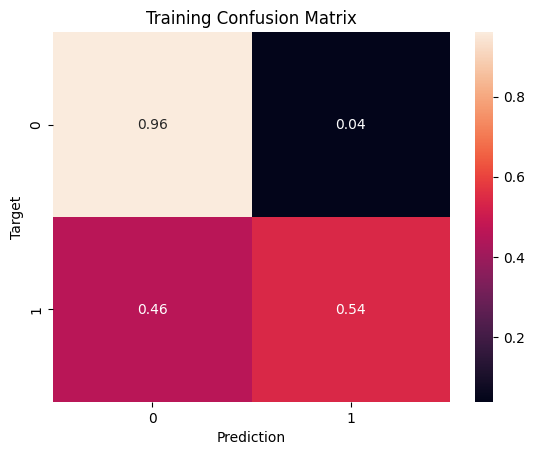

In [65]:
predict_and_plot(X_train, train_targets, name='Training')

Accuracy: 86.90%


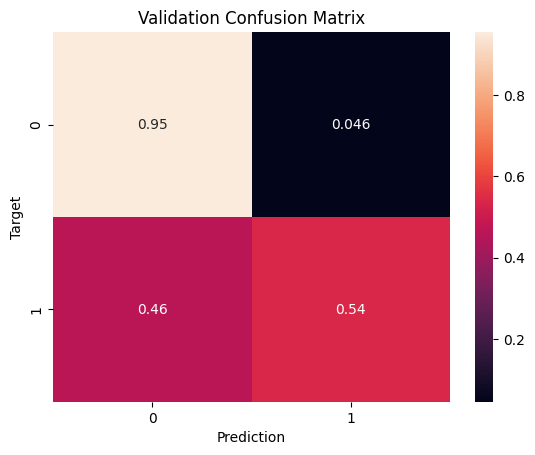

In [66]:
val_preds = predict_and_plot(X_val, val_targets, 'Validation')

In [67]:
def compute_auroc_and_build_roc(inputs, targets, name=''):
  # Predict probabilities
  y_pred_proba = model.predict_proba(inputs)[:, 1]

  # Compute ROC curve
  fpr, tpr, thresholds = roc_curve(targets, y_pred_proba, pos_label=1)

    # Compute AUROC
  roc_auc = auc(fpr, tpr)
  print(f'AUROC for {name}: {roc_auc:.2f}')

  # Plot the ROC curve
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f'Receiver Operating Characteristic (ROC) Curve for {name}')
  plt.legend(loc="lower right")
  plt.show()

AUROC for Training: 0.88


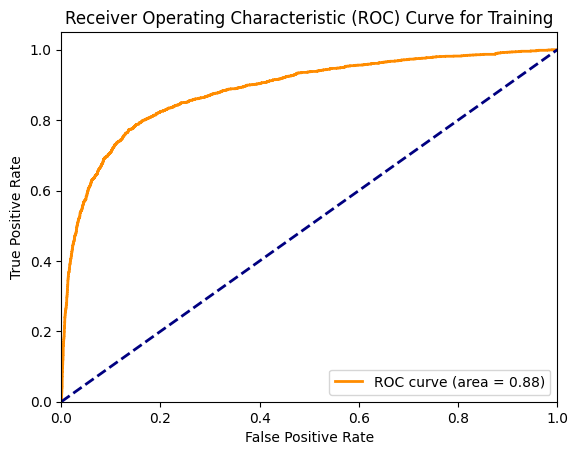

AUROC for Validation: 0.88


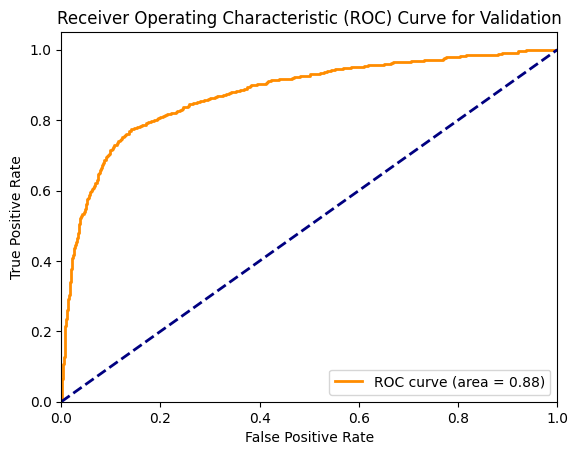

In [68]:
compute_auroc_and_build_roc(X_train, train_targets, 'Training')
compute_auroc_and_build_roc(X_val, val_targets, 'Validation')

In [69]:
from sklearn.metrics import f1_score

In [70]:
train_probas = model.predict_proba(train_inputs)[:, 1]
val_probas = model.predict_proba(val_inputs)[:, 1]

In [71]:
threshold = 0.5
train_preds = (train_probas >= threshold).astype(int)
val_preds = (val_probas >= threshold).astype(int)

In [72]:
f1_train = f1_score(train_targets, train_preds, pos_label=1)
f1_val = f1_score(val_targets, val_preds, pos_label=1)

print(f"F1-Score (Train): {f1_train}")
print(f"F1-Score (Validation): {f1_val}")

F1-Score (Train): 0.6381197681905988
F1-Score (Validation): 0.6253574833174452


In [73]:
thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]
for threshold in thresholds:
    train_preds = (train_probas >= threshold).astype(int)
    val_preds = (val_probas >= threshold).astype(int)

    f1_train = f1_score(train_targets, train_preds, pos_label=1)
    f1_val = f1_score(val_targets, val_preds, pos_label=1)

    print(f"Threshold: {threshold}")
    print(f"F1-Score (Train): {f1_train}")
    print(f"F1-Score (Validation): {f1_val}")

Threshold: 0.3
F1-Score (Train): 0.6765080173072029
F1-Score (Validation): 0.6788710907704043
Threshold: 0.4
F1-Score (Train): 0.6708751793400287
F1-Score (Validation): 0.6563838903170522
Threshold: 0.5
F1-Score (Train): 0.6381197681905988
F1-Score (Validation): 0.6253574833174452
Threshold: 0.6
F1-Score (Train): 0.5784418356456777
F1-Score (Validation): 0.5720294426919033
Threshold: 0.7
F1-Score (Train): 0.5007763975155279
F1-Score (Validation): 0.47497089639115253


Якість моделі скоріше задовільна - f1 показує, що можна рухатись у сторону поліпшення recall. Також тестування різних порогів показало, що кращий f1 буде при значенні Threshold: 0.3

8. Створіть передбачення моделі, яка передбачає завжди мажоритарний клас (той, якого більше в тренувальних даних). Порахуйте Accuracy на тренувальних та валідаційних даних для цієї моделі і тої, що ми натренували в п.6. Зробіть заключення про якість нашої моделі: якість хороша, погана, задовільна?

In [74]:
train_targets.value_counts()

,count
Exited,
0.0,7169
1.0,1831


In [75]:
from sklearn.metrics import accuracy_score

In [76]:
def all_0(inputs):
    return np.full(len(inputs), 0)

In [77]:
print(f"Accuracy (Train) : {accuracy_score(train_targets, train_preds):.2f}")
print(f"Accuracy (Validation): {accuracy_score(val_targets, val_preds):.2f}")

Accuracy (Train) : 0.86
Accuracy (Validation): 0.85


In [78]:
print(f"Accuracy (Train): {accuracy_score(train_targets, all_0(train_inputs)):.2f}")
print(f"Accuracy (Validation): {accuracy_score(val_targets, all_0(val_inputs)):.2f}")

Accuracy (Train): 0.80
Accuracy (Validation): 0.80


Наша модель краще базової з мажоритарним класом, що демонструє і Accuracy і f1, вона непогано передбачає обидва класи.

9. Збережіть модель і інші обʼєкти, які ви хотіли б зберегти, з використанням бібліотеки joblib в файл `log_reg.joblib`. Потім завантажте модель з файлу в змінну `model_2` (цим ми тренуємось завантажувати модель з файлу на майбутнє).

In [79]:
import joblib

In [80]:
log_reg_churn_pred = {
    'model': model,
    'encoder': encoder,
    'scaler': scaler,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
}

In [81]:
joblib.dump(log_reg_churn_pred, 'log_reg_churn_pred.joblib')

['log_reg_churn_pred.joblib']

In [82]:
model_2 = joblib.load('log_reg_churn_pred.joblib')

In [83]:
test_preds2 = model_2['model'].predict(X_train)
accuracy_score(train_targets, test_preds2)

0.8751111111111111

10. Ознайомтесь з роботою наведеної функції `predict_raw_df`. Ця функція робить підготовку даних (масштабування числових колонок і кодування категоріальних) і виводить ймовірності належності до класу 1 для кожного рядка в наданому наборі.

Доповніть або внесіть зміни у функцію з врахуванням вашого препроцесингу даних.

In [103]:
import warnings
warnings.filterwarnings("ignore")

def predict_raw_df(scaler, encoder, numeric_cols, categorical_cols, input_df: pd.DataFrame):
    cols_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance','NumOfProducts','EstimatedSalary']
    input_df[cols_to_scale] = scaler.transform(input_df[cols_to_scale])
    input_df[categorical_cols] = encoder.transform(input_df[categorical_cols])
    input_df['IsZeroBalance']= (input_df['Balance'] == 0).astype(int)
    ##X_input = input_df[numeric_cols + categorical_cols + ['IsZeroBalance']]
    X_input = input_df[model.feature_names_in_]
    prob = model.predict_proba(X_input)[:,1]
    return prob

11. Зчитайте дані з `test.csv` в змінну `test_raw_df`. Зробіть передбачення для кожного рядка даних з функцією з попереднього завдання і запишіть результат в нову колонку `Exited` в датафреймі `test_raw_df`.

In [95]:
test_raw_df =pd.read_csv('/content/drive/MyDrive/data/Kaggle | Bank Customer Churn Prediction/test.csv')
test_raw_df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15000,15594796.0,Chu,584.0,Germany,Male,30.0,2.0,146053.66,1.0,1.0,1.0,157891.86
1,15001,15642821.0,Mazzi,551.0,France,Male,39.0,5.0,0.00,2.0,1.0,1.0,67431.28
2,15002,15716284.0,Onyekachi,706.0,France,Male,43.0,8.0,0.00,2.0,1.0,0.0,156768.45
3,15003,15785078.0,Martin,717.0,Spain,Male,45.0,3.0,0.00,1.0,1.0,1.0,166909.87
4,15004,15662955.0,Kenechukwu,592.0,Spain,Male,43.0,8.0,0.00,2.0,1.0,1.0,143681.97


In [104]:
predict_raw_df(scaler, encoder, numeric_cols, categorical_cols, test_raw_df)

array([0.50812636, 0.01110917, 0.03881442, ..., 0.03761566, 0.78932278,
       0.78651343])

In [106]:
test_raw_df["Exited"] = predict_raw_df(scaler, encoder, numeric_cols, categorical_cols, test_raw_df)

In [107]:
test_raw_df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,IsZeroBalance,Exited
0,15000,15594796.0,Chu,-9.276411,0.203444,0.203444,-5.288889,-2.795668,-0.719292,-52.425652,1.0,1.0,-2.580457,0,1.000000
1,15001,15642821.0,Mazzi,-9.276411,0.203444,0.203444,-5.288635,-2.777477,-0.719292,-29.205979,1.0,1.0,-2.580457,0,0.999990
2,15002,15716284.0,Onyekachi,-9.276411,0.203444,0.203444,-5.288521,-2.759286,-0.719292,-29.205979,1.0,0.0,-2.580457,0,0.999997
3,15003,15785078.0,Martin,-9.276411,0.203444,0.203444,-5.288465,-2.789605,-0.719292,-52.425652,1.0,1.0,-2.580457,0,1.000000
4,15004,15662955.0,Kenechukwu,-9.276411,0.203444,0.203444,-5.288521,-2.759286,-0.719292,-29.205979,1.0,1.0,-2.580457,0,0.999990


12. Зчитайте файл 'sample_submission.csv' і зповніть колонку `Exited` передбаченими вашою моделлю значеннями для кожного відповідного `id` клієнта.
Виведіть перші 5 рядків фінального датасету, збережіть результат в файл `submission_log_reg.csv` (УВАГА! не запишіть випадково ще індекси рядків!) і здайте цей файл на Kaggle зі свого профіля натиснувши `Submit Prediction`.

In [108]:
sample_submission = pd.read_csv('/content/drive/MyDrive/data/Kaggle | Bank Customer Churn Prediction/sample_submission.csv')

In [109]:
sample_submission.head()

,id,Exited
0,15000,0.5
1,15001,0.5
2,15002,0.5
3,15003,0.5
4,15004,0.5


In [111]:
submission_log_reg = test_raw_df[['id', 'Exited']].copy()
submission_log_reg.head()

,id,Exited
0,15000,1.000000
1,15001,0.999990
2,15002,0.999997
3,15003,1.000000
4,15004,0.999990


In [121]:
data_dir

'/content/drive/MyDrive/data/Kaggle | Bank Customer Churn Prediction'

In [122]:
submission_log_reg.to_csv( os.path.join(data_dir, 'submission_log_reg.csv'), index=False)